# Tarefa Dataset Grupo

### Produção Energética e Sustentabilidade

https://www.kaggle.com/competitions/daasbstp2023

Imports Necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import re
import seaborn as sns
import pylab as pl



Ingestão de Dados

In [2]:
df_energia_2021 = pd.read_csv('energia_202109-202112.csv',na_filter=False)
print (df_energia_2021.size)
df_energia_2022 = pd.read_csv('energia_202201-202212.csv',na_filter=False)
df_meteo_2021 = pd.read_csv('meteo_202109-202112.csv',na_filter=False)
df_meteo_2022 = pd.read_csv('meteo_202201-202212.csv',na_filter=False)

#ver os cabeçalhos para fazer merge por data e hora

print(df_energia_2021.head())
print(df_meteo_2021.head())


# o dia era interessante fazer com o dia do ano -1 até 365. Não há anos bissextos, não há problema
print (df_meteo_2021.dtypes)
print (df_energia_2021.dtypes)
print (df_meteo_2021['dt_iso'])
form = re.compile(r'(\d{4}-\d{2}-\d{2})\s(\d{2}):\d{2}:\d{2}\s\+\d{4}\sUTC')
#df_meteo_2021['Data'],df_meteo_2021['Hora'] =df_meteo_2021['dt_iso'].str.extract(form)

#desdobrar data para o dataset meteorológico de 2021
data= df_meteo_2021['dt_iso'].str.extract(form)
df_meteo_2021['Data']= data[0]
df_meteo_2021['Hora']= pd.to_numeric(data[1])
#df_meteo_2021['Data'], df_meteo_2021['Hora'] = zip(*df_meteo_2021['dt_iso'].str.extract(form).values)
df_meteo_2021.drop(['dt_iso'], axis='columns', inplace=True)

#desdobrar data para o dataset meteorológico de 2022
data= df_meteo_2022['dt_iso'].str.extract(form)
df_meteo_2022['Data']= data[0]
df_meteo_2022['Hora']= pd.to_numeric(data[1])
#df_meteo_2022['Data'], df_meteo_2022['Hora'] = zip(*df_meteo_2022['dt_iso'].str.extract(form).values)
df_meteo_2022.drop(['dt_iso'], axis='columns', inplace=True)

print (df_meteo_2021.head())
print (df_meteo_2022.head())

df_2021 = pd.merge(df_energia_2021,df_meteo_2021, how='inner', on=['Data','Hora']) 
df_2022 = pd.merge(df_energia_2022,df_meteo_2022, how='inner', on=['Data','Hora'])

df_train= pd.concat([df_2021, df_2022], ignore_index=True)

##TESTE

df_energia_2023 = pd.read_csv('energia_202301-202304.csv')
df_meteo_2023 = pd.read_csv('meteo_202301-202304.csv')




#desdobrar data para o dataset meteorológico de 2023
data= df_meteo_2023['dt_iso'].str.extract(form)
df_meteo_2023['Data']= data[0]
df_meteo_2023['Hora']= pd.to_numeric(data[1])
#df_meteo_2022['Data'], df_meteo_2022['Hora'] = zip(*df_meteo_2022['dt_iso'].str.extract(form).values)
df_meteo_2023.drop(['dt_iso'], axis='columns', inplace=True)


#Analise aos dados 

df_teste=pd.read_csv('teste_correspondencia.csv')
form = re.compile(r'(\d{4}-\d{2}-\d{2})T(\d{2}):\d{2}')

#desdobrar data para o dataset meteorológico de 2021
data= df_teste['time'].str.extract(form)
df_teste['Data']= data[0]
df_teste['Hora']= pd.to_numeric(data[1])
#df_meteo_2021['Data'], df_meteo_2021['Hora'] = zip(*df_meteo_2021['dt_iso'].str.extract(form).values)
df_teste.drop(['time'], axis='columns', inplace=True) 
df_teste = pd.merge(df_meteo_2023,df_teste, how='inner', on=['Data','Hora']) 

print("TESTEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE")
print(df_teste)

contagem_por_grupo = df_teste.groupby(['weather_description', 'weather_code (wmo code)']).size().reset_index(name='contagem')
print(contagem_por_grupo)




#NOVOS DADOS 
df_meteo_2023_nd = pd.read_csv('meteorologia_2023.csv')
print(df_meteo_2023_nd.columns)


form = re.compile(r'(\d{4}-\d{2}-\d{2})T(\d{2}):\d{2}')

#desdobrar data para o dataset meteorológico de 2021
data= df_meteo_2023_nd['time'].str.extract(form)
df_meteo_2023_nd['Data']= data[0]
df_meteo_2023_nd['Hora']= pd.to_numeric(data[1])
#df_meteo_2021['Data'], df_meteo_2021['Hora'] = zip(*df_meteo_2021['dt_iso'].str.extract(form).values)
df_meteo_2023_nd.drop(['time'], axis='columns', inplace=True)
print(df_meteo_2023_nd.columns)

#tentar converter os valores
#df_meteo_2023_nd.drop(['weather_code (wmo code)'], axis='columns', inplace=True)

df_meteo_2023= pd.concat([df_meteo_2023, df_meteo_2023_nd], ignore_index=True)
df_meteo_2023.drop(['w'], axis='columns', inplace=True)



print("AQUIIIIIIIIIIIIIIIIIIIIIIIIIIII")
print(df_meteo_2023)




df_2023 = pd.merge(df_energia_2023,df_meteo_2023, how='left', on=['Data','Hora']) 

def extrair_mes_dia(row):
    # Use uma expressão regular para encontrar o mês e o dia na data
    padrao = r"\d{4}-(\d{2}-\d{2})"
    correspondencia = re.match(padrao, row['Data'])
    
    # Use os grupos capturados para obter o mês e o dia
    mes= correspondencia.group(1)
    return mes

def periodo_dia(row):
    if  row['Sunrise']<= row['Hora'] < 12:
    #if  8< row['Hora'] < 12:
        return 0
    elif 12 <= row['Hora'] < row['Sunset']:
    #elif 12 <= row['Hora'] < 8:
        return 1
    else:
        return 2

df_sunrise = pd.read_csv('data.csv')
for df in [df_train,df_2023]:
    df['Dia'] = df.apply(extrair_mes_dia, axis=1) 

df_train = pd.merge(df_train,df_sunrise, how='inner', on=['Dia'])
df_train['Periodo']= df_train.apply(periodo_dia, axis=1)
print(df_train.head())
df_train.drop('Dia',axis='columns', inplace=True)
df_train.drop('Sunset',axis='columns', inplace=True)
df_train.drop('Sunrise',axis='columns', inplace=True)

df_2023 = pd.merge(df_2023,df_sunrise, how='inner', on=['Dia'])
df_2023['Periodo']= df_2023.apply(periodo_dia, axis=1)
print(df_2023.head())
df_2023.drop('Dia',axis='columns', inplace=True)
df_2023.drop('Sunset',axis='columns', inplace=True)
df_2023.drop('Sunrise',axis='columns', inplace=True)

print(df_train.dtypes)
print(df_2023.dtypes)






#print(df_2023.shape)
#print(df_meteo_2023.columns)
#print(df_2023)
#df_2023 = pd.merge(df_2023,df_meteo_2023, how='left', on=['Data','Hora']) 

print(df_2023)






13536
         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injecao na rede (kWh)  
0                  None  
1                  None  
2                  None  
3                  None  
4                  None  
           dt                         dt_iso city_name   temp  feels_like  \
0  1630454400  2021-09-01 00:00:00 +0000 UTC     local  18.74       18.84   
1  1630458000  2021-09-01 01:00:00 +0000 UTC     local  18.73       18.83   
2  1630461600  2021-09-01 02:00:00 +0000 UTC     local  17.84       17.98   
3  1630465200  2021-09-01 03:00:00 +0000 UT

Análise de Dados


Verificar se a construção dos datasets foi bem realizada

In [3]:
df_train.shape

(11016, 21)

In [4]:
df_2023.nunique()

Data                         94
Hora                         24
Normal (kWh)                709
Horario Economico (kWh)     490
Autoconsumo (kWh)           485
dt                         1752
city_name                     1
temp                        967
feels_like                 1084
temp_min                    169
temp_max                    174
pressure                    175
sea_level                     0
grnd_level                  159
humidity                     75
wind_speed                  656
rain_1h                     136
clouds_all                  100
weather_description           8
Periodo                       3
dtype: int64

In [5]:
df_train.nunique()


Data                         459
Hora                          24
Normal (kWh)                1282
Horario Economico (kWh)      851
Autoconsumo (kWh)            752
Injecao na rede (kWh)          5
dt                         11016
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
sea_level                      1
grnd_level                     1
humidity                      82
wind_speed                   771
rain_1h                      368
clouds_all                   101
weather_description            8
Periodo                        3
dtype: int64

In [6]:
df_train.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,city_name,temp,feels_like,...,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Periodo
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,local,13.97,13.54,...,14.04,1027,,,81,1.96,,87,overcast clouds,2
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,local,13.48,13.02,...,13.90,1028,,,82,1.83,,91,overcast clouds,2
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,local,12.93,12.47,...,13.43,1027,,,84,1.96,,93,overcast clouds,2
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,local,12.61,12.15,...,12.93,1027,,,85,1.85,,95,overcast clouds,2
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,local,12.61,12.17,...,12.93,1027,,,86,1.83,,93,overcast clouds,2


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horario Economico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injecao na rede (kWh)    11016 non-null  object 
 6   dt                       11016 non-null  int64  
 7   city_name                11016 non-null  object 
 8   temp                     11016 non-null  float64
 9   feels_like               11016 non-null  float64
 10  temp_min                 11016 non-null  float64
 11  temp_max                 11016 non-null  float64
 12  pressure                 11016 non-null  int64  
 13  sea_level                11016 non-null  object 
 14  grnd_level            

Verificar se a construção dos datasets foi bem realizada

In [8]:
df_train.describe()



,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Periodo
count,11016.000000,11016.000000,11016.000000,11016.000000,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,11.500000,0.202278,0.159714,0.117314,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,76.570715,2.672039,54.000908,1.323257
std,6.922501,0.349478,0.271792,0.176762,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,16.268260,1.476158,40.553002,0.762958
min,0.000000,0.000000,0.000000,0.000000,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,66.000000,1.620000,7.000000,1.000000
50%,11.500000,0.000000,0.000000,0.000000,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,81.000000,2.400000,60.000000,2.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,91.000000,3.420000,98.000000,2.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,11.100000,100.000000,2.000000


Visualização de Mising values

In [9]:
df_train.isna().sum()

Data                       0
Hora                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dt                         0
city_name                  0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level                  0
grnd_level                 0
humidity                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
Periodo                    0
dtype: int64

In [10]:
df_2023.isna().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
dt                          504
city_name                   504
temp                          0
feels_like                    0
temp_min                    504
temp_max                    504
pressure                      0
sea_level                  2256
grnd_level                 1752
humidity                      0
wind_speed                    0
rain_1h                    1546
clouds_all                    0
weather_description         504
Periodo                       0
dtype: int64

Verificação de todos os valores da coluna Injeção na rede

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


'\nf_train=df_train.fillna({\'Injecao na rede (kWh)\': \'None\'})\n\nprint (df_train.isna().sum())\n\nsns.histplot(df_train["weather_description"],y=df_train["weather_description"])\nsns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])\n\nsns.histplot(df_train["city_name"],y=df_train["city_name"])\nsns.histplot(df_2023["city_name"],y=df_2023["city_name"])\n\nprint(df_train.describe())\n\n\n\n\nprint (df_train.shape) # verfiicar se o número de linhas está correto\n\nprint(df_train.info())\n'

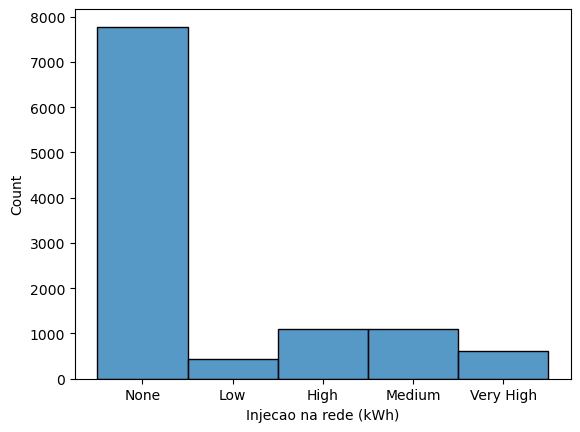

In [11]:
sns.histplot(df_train["Injecao na rede (kWh)"])















"""
f_train=df_train.fillna({'Injecao na rede (kWh)': 'None'})

print (df_train.isna().sum())

sns.histplot(df_train["weather_description"],y=df_train["weather_description"])
sns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])

sns.histplot(df_train["city_name"],y=df_train["city_name"])
sns.histplot(df_2023["city_name"],y=df_2023["city_name"])

print(df_train.describe())




print (df_train.shape) # verfiicar se o número de linhas está correto

print(df_train.info())
"""

In [12]:
df_train['Injecao na rede (kWh)'].value_counts()

Injecao na rede (kWh)
None         7777
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

O campo weather_description possuem os mesmos valores para o campo weather_description

In [13]:
df_2023['weather_description'].value_counts()

weather_description
sky is clear            739
overcast clouds         305
light rain              299
broken clouds           149
scattered clouds        118
few clouds               70
moderate rain            65
heavy intensity rain      7
Name: count, dtype: int64

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='weather_description'>

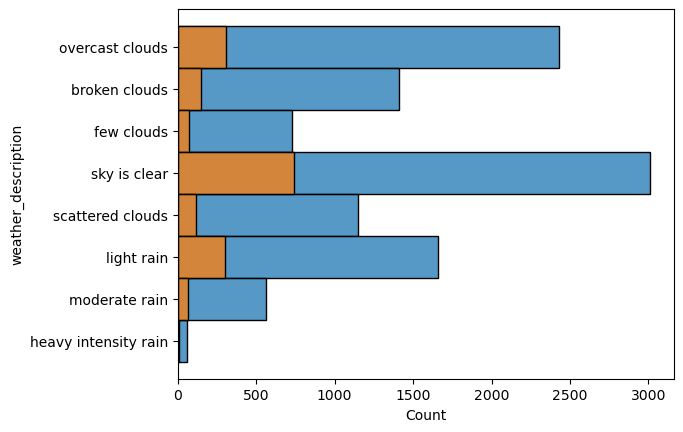

In [14]:
sns.histplot(df_train["weather_description"],y=df_train["weather_description"])
sns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])

Os dados indicam que as medições foram todos realizados numa única cidade,que segundo o enunciado do problema é Braga

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='city_name'>

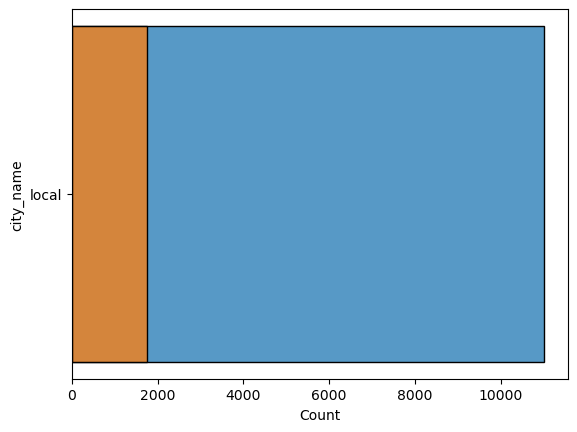

In [15]:
sns.histplot(df_train["city_name"],y=df_train["city_name"])
sns.histplot(df_2023["city_name"],y=df_2023["city_name"])

1-Primavera2-Verao3-Outono4-Inverno

In [16]:
#sns.catplot(x="Estacao", y="pressure", data=df_train, kind="box", aspect=1.5)
#plt.title("Boxplot for Class vs Proline")
#plt.show()


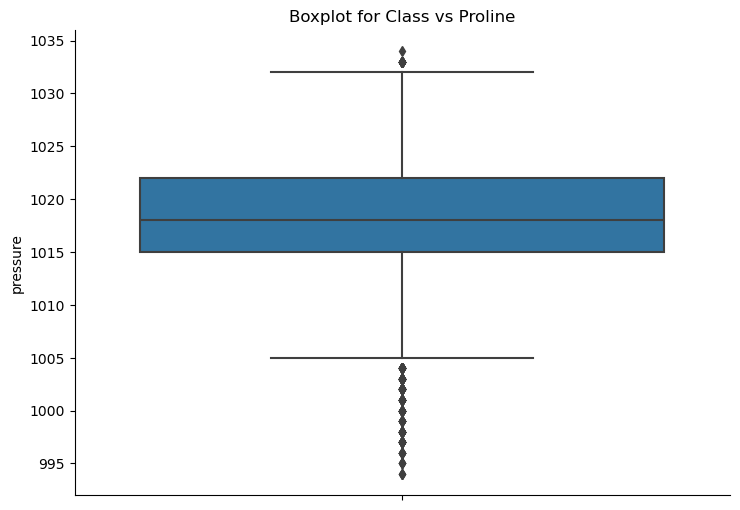

In [17]:
sns.catplot(y="pressure", data=df_train, kind="box", aspect=1.5)
plt.title("Boxplot for Class vs Proline")
plt.show()

In [18]:
#sns.catplot(x="Estacao", y="temp", data=df_train, kind="box", aspect=1.5)
#plt.title("Boxplot for Class vs Proline")
#plt.show()


0- Manhã
1-Tarde
2-Noite


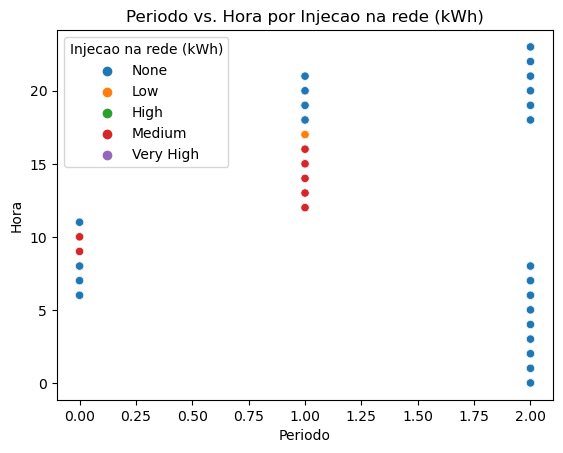

In [19]:
sns.scatterplot(x='Periodo', y='Hora', hue='Injecao na rede (kWh)', data=df_train)
plt.title('Periodo vs. Hora por Injecao na rede (kWh)')
plt.xlabel('Periodo')
plt.ylabel('Hora')
plt.show()

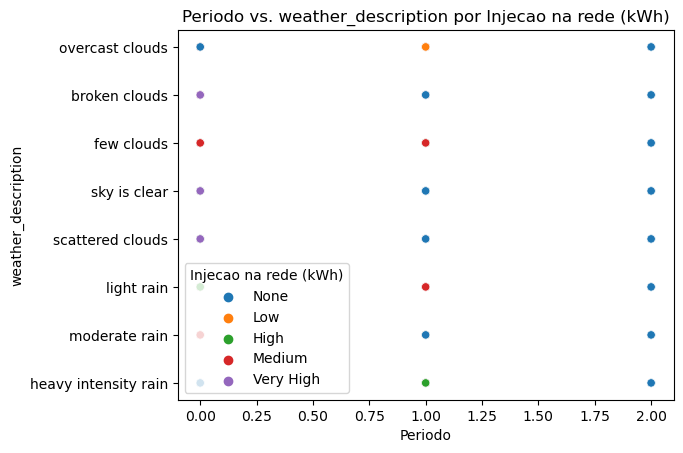

In [20]:
sns.scatterplot(x='Periodo', y='weather_description', hue='Injecao na rede (kWh)', data=df_train)
plt.title('Periodo vs. weather_description por Injecao na rede (kWh)')
plt.xlabel('Periodo')
plt.ylabel('weather_description')
plt.show()

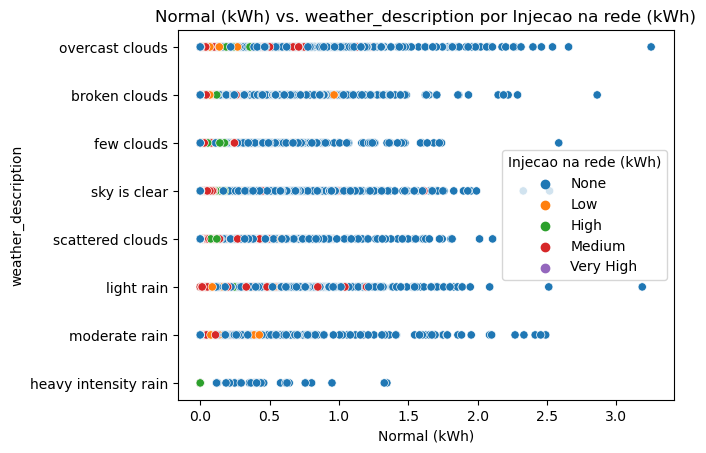

In [21]:
sns.scatterplot(x='Normal (kWh)', y='weather_description', hue='Injecao na rede (kWh)', data=df_train)
plt.title('Normal (kWh) vs. weather_description por Injecao na rede (kWh)')
plt.xlabel('Normal (kWh)')
plt.ylabel('weather_description')
plt.show()

Matriz de Correlação

In [22]:
#correlation_matrix = df_train.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()

Rank correlation

Hora                         int64
Normal (kWh)               float64
Horario Economico (kWh)    float64
Autoconsumo (kWh)          float64
Injecao na rede (kWh)        int32
dt                           int64
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                     int64
humidity                     int64
wind_speed                 float64
clouds_all                   int64
weather_description          int32
Periodo                      int64
dtype: object


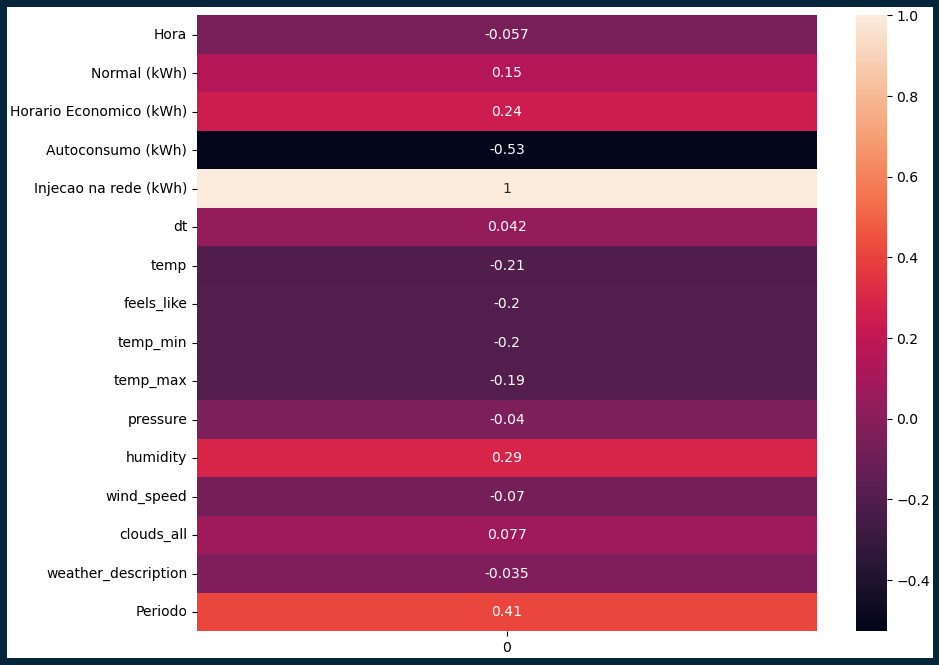

In [23]:
df_train_rank=df_train.copy()
df_train_rank.drop(['sea_level'], axis='columns', inplace=True)
df_train_rank.drop(['grnd_level'], axis='columns', inplace=True)
df_train_rank.drop(['city_name'], axis='columns', inplace=True)
df_train_rank.drop(['Data'], axis='columns', inplace=True)
df_train_rank.drop(['rain_1h'], axis='columns', inplace=True)
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Aplique o mapeamento ao DataFrame usando o método transform
df_train_rank['Injecao na rede (kWh)'] = label_encoder.fit_transform(df_train_rank['Injecao na rede (kWh)'])
df_train_rank['weather_description'] = label_encoder.fit_transform(df_train_rank['weather_description'])



print(df_train_rank.dtypes)
plt.figure(figsize=(10,8),linewidth=10,edgecolor="#04253a" )
sns.heatmap(df_train_rank.corrwith(df_train_rank['Injecao na rede (kWh)']).to_frame(), annot=True)
plt.show()

Tratamento de Dados

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
11011    0.000
11012    0.000
11013    0.000
11014    0.498
11015    0.446
Name: Horario Economico (kWh), Length: 11016, dtype: float64
         out_min  out_max
Estacao                  
1         1009.5   1024.5
2         1010.0   1022.0
3         1007.0   1031.0
4         1011.5   1038.5
(10414, 25)
          out_min   out_max
Estacao                    
1         6.50000  27.14000
2        10.82375  31.72625
3         6.03000  23.31000
4         4.56000  19.47000


"\n#churn to nominal\ndf['Churn'] = df['Churn'].astype('category') #.apply(str)\nprint(df.dtypes)\n\n# fazer um matplotlib com os churns \n#print(df.head())\n\nx = df.drop(['Churn','State','Phone'], axis=1)\ny = df['Churn'].to_frame()\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)\n\nclf = DecisionTreeClassifier(random_state=2021)\n\nclf.fit(x_train, y_train)\n\npredict = clf.predict(x_test)\n\nconfusion_matrix = confusion_matrix(y_test, predict)\n\nprint(confusion_matrix)\n\nprint(confusion_matrix)\n\naccuracy = accuracy_score(y_test, predict)\n\nprint(accuracy)\n\nprecision = precision_score(y_test, predict)\n\nprint(precision)\n\nrecall = recall_score(y_test, predict)\n\nprint(recall)\n\n"

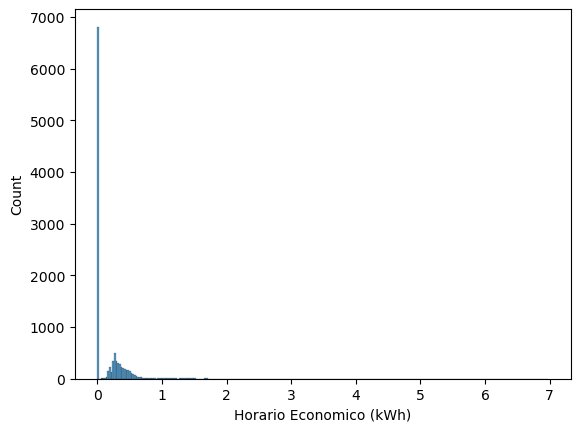

In [24]:

#print(f"History: {df_train["Horario Economico (kWh)"].hist()}")
sns.histplot(df_train["Horario Economico (kWh)"])
print(df_train["Horario Economico (kWh)"])
#print(dfCSV.head())
#print(dfXLS.head())

form = re.compile(r'\d{4}-(\d{2})-\d{2}')

data= df_train['Data'].str.extract(form)
df_train['Mes']= pd.to_numeric(data[0])
#df_meteo_2023['Hora']= pd.to_numeric(data[1])
data= df_2023['Data'].str.extract(form)
df_2023['Mes']= pd.to_numeric(data[0])


def data_para_estacao(data):
    # Divida a data em mês e dia
    mes, dia = data.month, data.day
    
    # Determine a estação com base no mês e dia
    if (mes > 3 and mes <= 5) or (mes == 3 and dia >= 21) or (mes == 6 and dia < 21):
        return 1
    elif (mes >= 6 and mes <= 8) or (mes == 9 and dia < 23):
        return 2
    elif (mes >= 9 and mes <= 11) or (mes == 12 and dia < 21) :
        return 3
    else:
        return 4

# Converta a coluna 'Data' em datetime
df_train['Data'] = pd.to_datetime(df_train['Data'])

# Aplique a função para obter a estação do ano
df_train['Estacao'] = df_train['Data'].apply(data_para_estacao)


# Converta a coluna 'Data' em datetime
df_2023['Data'] = pd.to_datetime(df_2023['Data'])

# Aplique a função para obter a estação do ano
df_2023['Estacao'] = df_2023['Data'].apply(data_para_estacao)


df_train['Injecao na rede (kWh)']= df_train['Injecao na rede (kWh)'].astype('category')

#outliers
"""
# calculate IQR for column pressure
Q1 = df_train['pressure'].quantile(0.25)
Q3 = df_train['pressure'].quantile(0.75)
IQR = Q3 - Q1

print(df_train.shape)
# identify outliers

threshold = 1.5
outliers = df_train[(df_train['pressure'] < Q1 - threshold * IQR) | (df_train['pressure'] > Q3 + threshold * IQR)]

df_train = df_train.drop(outliers.index)

print(df_train.shape)
"""

"""
# calculate IQR for column temp
Q1 = df_train['temp'].quantile(0.25)
Q3 = df_train['temp'].quantile(0.75)
IQR = Q3 - Q1

print(df_train.shape)
# identify outliers

threshold = 1.5
outliers = df_train[(df_train['temp'] < Q1 - threshold * IQR) | (df_train['temp'] > Q3 + threshold * IQR)]

df_train = df_train.drop(outliers.index)

print(df_train.shape)
"""

estatisticas_por_estacao = df_train.groupby('Estacao')['pressure'].agg(['describe'])

# Renomeia as colunas para melhorar a legibilidade

#estatisticas_por_estacao['IQR'] = estatisticas_por_estacao['quantile_0.75'] - estatisticas_por_estacao['quantile_0.25']

estatisticas_por_estacao.columns = ['count','mean','std','min','25%', '50%', '75%','max']

estatisticas_por_estacao['IQR'] = estatisticas_por_estacao['75%'] - estatisticas_por_estacao['25%']

estatisticas_por_estacao['out_min'] = estatisticas_por_estacao['50%']-1.5*estatisticas_por_estacao['IQR']
estatisticas_por_estacao['out_max'] = estatisticas_por_estacao['50%']+1.5*estatisticas_por_estacao['IQR']
estatisticas_por_estacao=estatisticas_por_estacao[['out_min','out_max']]

# Exibe o DataFrame com as estatísticas
print(estatisticas_por_estacao)

# Mescla os DataFrames 'dados' e 'limites_outliers' usando a coluna 'Estacao'
df_train= pd.merge(df_train, estatisticas_por_estacao, on='Estacao', how='left')

# Marca as observações como outliers com base nos limites
df_train = df_train[~((df_train['pressure'] < df_train['out_min']) | (df_train['pressure'] > df_train['out_max']))]

print(df_train.shape)

df_train.drop(['out_min','out_max'], axis='columns', inplace=True)

#---------------------------------------------------------------------------------

estatisticas_por_estacao = df_train.groupby('Estacao')['temp'].agg(['describe'])

# Renomeia as colunas para melhorar a legibilidade

#estatisticas_por_estacao['IQR'] = estatisticas_por_estacao['quantile_0.75'] - estatisticas_por_estacao['quantile_0.25']

estatisticas_por_estacao.columns = ['count','mean','std','min','25%', '50%', '75%','max']

estatisticas_por_estacao['IQR'] = estatisticas_por_estacao['75%'] - estatisticas_por_estacao['25%']

estatisticas_por_estacao['out_min'] = estatisticas_por_estacao['50%']-1.5*estatisticas_por_estacao['IQR']
estatisticas_por_estacao['out_max'] = estatisticas_por_estacao['50%']+1.5*estatisticas_por_estacao['IQR']
estatisticas_por_estacao=estatisticas_por_estacao[['out_min','out_max']]

# Exibe o DataFrame com as estatísticas
print(estatisticas_por_estacao)

# Mescla os DataFrames 'dados' e 'limites_outliers' usando a coluna 'Estacao'
df_train= pd.merge(df_train, estatisticas_por_estacao, on='Estacao', how='left')

# Marca as observações como outliers com base nos limites
df_train = df_train[~((df_train['temp'] < df_train['out_min']) | (df_train['temp'] > df_train['out_max']))]
df_train.drop(['out_min','out_max'], axis='columns', inplace=True)


#form = re.compile(r'\d{4}-\d{2}-(\d{2})')
#data= df_train['Data'].str.extract(form)
#df_train['Dia']= pd.to_numeric(data[0])
#data= df_2023['Data'].str.extract(form)
#df_2023['Dia']= pd.to_numeric(data[0])

#df_train['rain_1h'] = df_train['rain_1h'].fillna(0)
#df_2023['rain_1h'] = df_2023['rain_1h'].fillna(0)

"""
#churn to nominal
df['Churn'] = df['Churn'].astype('category') #.apply(str)
print(df.dtypes)

# fazer um matplotlib com os churns 
#print(df.head())

x = df.drop(['Churn','State','Phone'], axis=1)
y = df['Churn'].to_frame()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)

clf = DecisionTreeClassifier(random_state=2021)

clf.fit(x_train, y_train)

predict = clf.predict(x_test)

confusion_matrix = confusion_matrix(y_test, predict)

print(confusion_matrix)

print(confusion_matrix)

accuracy = accuracy_score(y_test, predict)

print(accuracy)

precision = precision_score(y_test, predict)

print(precision)

recall = recall_score(y_test, predict)

print(recall)

"""

Aprendizagem Supervisionada

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#label_encoder = LabelEncoder()
#df_train['Injecao na rede (kWh)'] = label_encoder.fit_transform(df_train['Injecao na rede (kWh)'])
#print(df_train["Injecao na rede (kWh)"])
#ordem_personalizada = ['None', 'Low', 'Medium','High','Very High']

# Inicialize o LabelEncoder
#label_encoder = LabelEncoder()

# Ajuste o LabelEncoder para a ordem personalizada
#label_encoder.fit(ordem_personalizada)

# Aplique o mapeamento ao DataFrame usando o método transform
#df_train['Injecao na rede (kWh)'] = label_encoder.fit_transform(df_train['Injecao na rede (kWh)'])

espectro_cat_type = pd.CategoricalDtype(categories=['None', 'Low', 'Medium','High','Very High'], 
                                        ordered=True)
     

df_train['Injecao na rede (kWh)'] = df_train['Injecao na rede (kWh)'].astype(espectro_cat_type)
#print(df_train.dtypes)
print(df_train['Injecao na rede (kWh)'])


label_encoder = LabelEncoder()
#analisar os valores - não há problema
df_train["weather_description"] = label_encoder.fit_transform(df_train['weather_description'])
#print(df_train["weather_description"])
print(df_train.dtypes)

df_2023["weather_description"] = label_encoder.fit_transform(df_2023['weather_description'])
print(df_2023["weather_description"])


sns.histplot(df_train["weather_description"],y=df_train["weather_description"])
sns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])

# Features and target
print(df_train.dtypes)
#x = df_train[["Hora","Normal (kWh)","Horario Economico (kWh)","Autoconsumo (kWh)","temp","pressure","humidity","wind_speed","clouds_all","weather_description"]]
x = df_train[["Hora","Normal (kWh)","Horario Economico (kWh)","Autoconsumo (kWh)","temp","pressure","humidity","wind_speed","clouds_all","Mes"]]
y = df_train["Injecao na rede (kWh)"]

correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
#remoção de feels_like. Correlação de 1 com a temperatura
#print(y)

# Train the linear regression model
#lm = LinearRegression()
#lm.fit(x, y)

# Your df_2023 data and cleaning operations remain the same




df_2023.drop(['Data'], axis='columns', inplace=True)
#df_2023.drop(['Hora'], axis='columns', inplace=True)
df_2023.drop(['city_name'], axis='columns', inplace=True)
df_2023.drop(['grnd_level'], axis='columns', inplace=True)
df_2023.drop(['rain_1h'], axis='columns', inplace=True)
df_2023.drop(['sea_level'], axis='columns', inplace=True)
df_2023.drop(['weather_description'], axis='columns', inplace=True)
df_2023.drop(['dt'], axis='columns', inplace=True)
df_2023.drop(['feels_like'], axis='columns', inplace=True)
df_2023.drop(['temp_max'], axis='columns', inplace=True)
df_2023.drop(['temp_min'], axis='columns', inplace=True)
df_2023.drop(['Periodo'], axis='columns', inplace=True)
#df_2023.drop(['Hora'], axis='columns', inplace=True)
#df_2023.drop(['Mes'], axis='columns', inplace=True)
df_2023.drop(['Estacao'], axis='columns', inplace=True)
#df_2023.drop(['w'], axis='columns', inplace=True)



print (df_2023)


#clf = DecisionTreeClassifier(random_state=2022)

#clf.fit(x, y)


param_grid = {
    'n_estimators': [10,25,50,75,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a base model
dt = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, refit=True, verbose=2)

# Fit the grid search to the data
grid_search.fit(x, y)

dt = grid_search.best_estimator_







# Crie um modelo de Árvore de Decisão
#dt = DecisionTreeClassifier(random_state=42)

my_x=x.copy()
my_y=y.copy()
scores=cross_val_score(dt,my_x,my_y,cv=100)
print(scores)
print("Accuracy: "+ str(scores.mean()))

labels=["None","Low","Medium","High","Very High"]
y_pred = cross_val_predict(dt, my_x, my_y, cv=10)
conf_mat = confusion_matrix(my_y, y_pred,labels=labels)
"""
#print(conf_mat)
pl.matshow(conf_mat)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()
"""
"""
num_classes = len(conf_mat)

# Crie uma figura
plt.figure()

# Use matshow para exibir a matriz de confusão como um mapa de calor
plt.matshow(conf_mat, cmap='viridis')

# Adicione rótulos aos eixos
plt.xticks(["Ant", "Bird", "Cat","p","o"])
plt.yticks(["Ant", "Bird", "Cat","p","o"])

# Adicione rótulos específicos às classes
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')

# Adicione os valores da matriz como texto
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_mat[i][j]), ha='center', va='center')

# Adicione uma barra de cores
plt.colorbar()

# Adicione um título
plt.title('Matriz de Confusão')

# Exiba o gráfico
plt.show()
"""

"""
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,refit=True, verbose=2)
grid_search.fit(x, y)


 
#descobriu os melhores parametros

clf = grid_search.best_estimator_
""" 
print(x.head())
print(df_2023.head())
predict = dt.predict(df_2023)
print(predict)

# Make predictions
#print(df_2023)
#prediction = lm.predict(df_2023)
prediction1=[]
for elem in predict:
    prediction1.append(elem)


# Create a DataFrame with 'RowId' and 'Result'
data = pd.DataFrame({'RowId': range(1, len(df_2023) + 1), 'Result': prediction1})




# Save the data to a CSV file
#print(predict)
data.to_csv('predictions.csv', index=False)

"""
for elem in predict:
    if elem <0.5:
        prediction1.append('High')
    elif elem <1.5:
        prediction1.append('Low')
    elif elem <2.5:
        prediction1.append('Medium') 
    elif elem <3.5:
        prediction1.append('None') 
    elif elem <4.5:
        prediction1.append('Very High') 
"""

# Use seaborn para criar um mapa de calor
sns.heatmap(conf_mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Print the predictions
#print("Predictions:")
#print(predict)



0        None
1        None
2        None
3        None
4        None
         ... 
10409    None
10410    None
10411    None
10412    None
10413    None
Name: Injecao na rede (kWh), Length: 9864, dtype: category
Categories (5, object): ['None' < 'Low' < 'Medium' < 'High' < 'Very High']
Data                       datetime64[ns]
Hora                                int64
Normal (kWh)                      float64
Horario Economico (kWh)           float64
Autoconsumo (kWh)                 float64
Injecao na rede (kWh)            category
dt                                  int64
city_name                          object
temp                              float64
feels_like                        float64
temp_min                          float64
temp_max                          float64
pressure                            int64
sea_level                          object
grnd_level                         object
humidity                            int64
wind_speed                        float6

      Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)   temp  \
0        0         0.000                    0.467              0.000  12.93   
1        1         0.000                    0.577              0.000  13.49   
2        2         0.000                    0.346              0.000  13.55   
3        3         0.000                    0.270              0.000  13.61   
4        4         0.000                    0.252              0.000  13.59   
...    ...           ...                      ...                ...    ...   
2251    19         0.953                    0.000              0.012  20.10   
2252    20         0.915                    0.000              0.000  13.60   
2253    21         0.479                    0.000              0.000  12.60   
2254    22         0.000                    0.497              0.000  11.70   
2255    23         0.000                    0.487              0.000   9.70   

      pressure  humidity  wind_speed  clouds_all  M

c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\simao\miniconda3\envs\envNAME\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_const

Geração da submission